In [1]:
import os
from src.models import *
from src.model_eval import get_model_eval
from src.utils import read_config, read_decoupage

In [2]:
data_folder = os.path.join("data", "parquet")

### Modèle classique

In [18]:
config_path = os.path.join("src", "config_on-chain.json")
seed = 5

In [19]:
n_features = len(read_config(config_path).get("features"))
model = LSTMSimpleNet(dim_input=n_features, dim_recurrent=32, classif=True)
# model = CNNRNNTorch(dim_input=n_features, classif=True)

c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


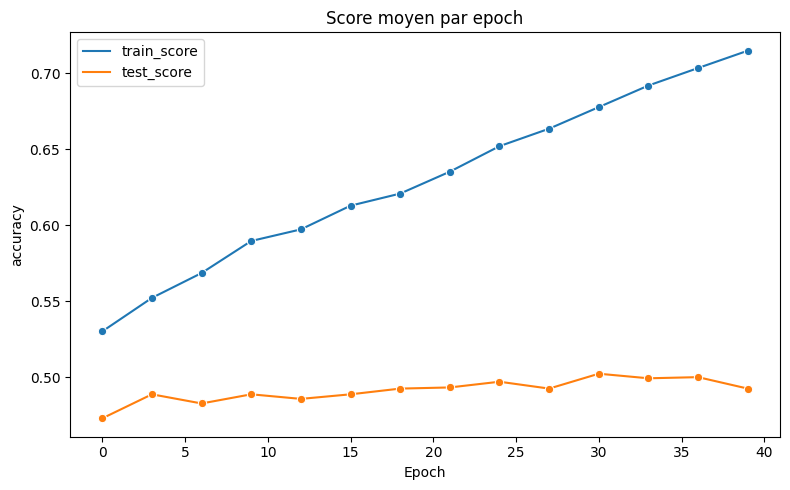

INFO: accuracy moyen : 0.4925             
Détail des scores : [0.46987951807228917, 0.4578313253012048, 0.536144578313253, 0.536144578313253, 0.4819277108433735, 0.4819277108433735, 0.4939759036144578, 0.4819277108433735]
            


In [20]:
model_eval = get_model_eval(model, config_path, seed)
scores = model_eval.get_scores()
model_eval.report(scores)

### Modèle d'ensemble

In [21]:
config_path = os.path.join("src", "config.json")
features = read_config(config_path).get("features")
decoupage_path = os.path.join("src", "features_decoupage.json")
decoupage = read_decoupage(decoupage_path, features)
seed = 5

In [22]:
# Instancier les sous-modèles
model_news = LSTMSimpleNet(dim_input=len(decoupage["news"]), dim_recurrent=32, classif=False)
model_lunar = LSTMSimpleNet(dim_input=len(decoupage["lunarcrush"]), dim_recurrent=32, classif=False)
model_onchain = LSTMSimpleNet(dim_input=len(decoupage["on-chain"]), dim_recurrent=32, classif=False)

models = [model_news, model_lunar, model_onchain]

# Instancier le modèle d'ensemble
model = EnsembleRNN(models, list(decoupage.values()), classif=True, bagging_method="fc")

c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


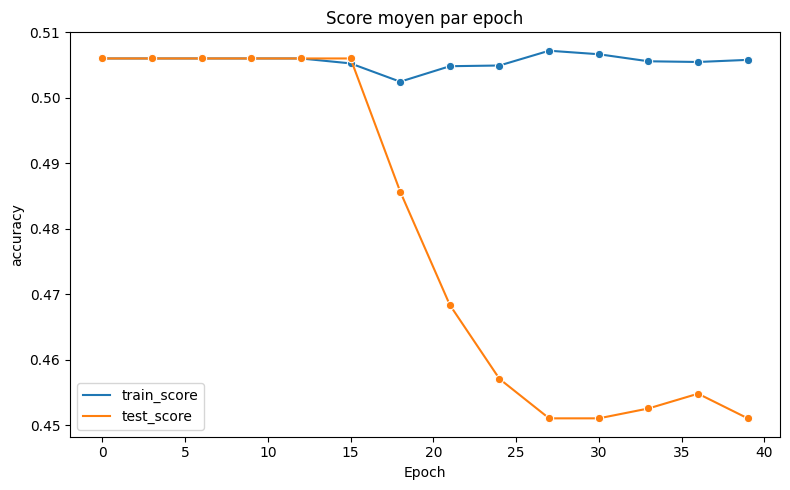

INFO: accuracy moyen : 0.4511             
Détail des scores : [0.42771084337349397, 0.4397590361445783, 0.4578313253012048, 0.4397590361445783, 0.4759036144578313, 0.43373493975903615, 0.463855421686747, 0.46987951807228917]
            


In [23]:
model_eval = get_model_eval(model, config_path, seed)
scores = model_eval.get_scores()
model_eval.report(scores)